Introduction
---
**BETA RELEASE**

*This project remains in the experimental stage and there are likely many tweaks to come that will improve/change outcomes. I do believe at this stage that the simulation provides good general insights regarding the relationship between various factors and viral spread.*

**RKnot's** purpose is two-fold:

1. Investigate the viral spread under conditions of heterogeneity
2. Investigate impacts of policy decisions on viral spread, hospital capacity, and fatalities


**RKnot** attempts to distinguish itself from prevailing models by simulating *every subject* and *every contact* in a population. This allows us to:

1. customize populations in order to explore almost any setting on any scale. 
2. introduce more realistic movement and contact patterns that do *not* fit commonly-used assumptions.
3. directly assess the impact of policy decisions by isolating and manipulating specific interactions.

[Standard models](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3782273/) of $R_0$ estimate HIT as:

\begin{equation}
HIT = 1 - 1/R_0 
\end{equation}

For a virus with $R_0$ of 2.5 ([as is estimated for sars-cov-2](https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html)), this results in a HIT of 60%. 
Yet, measurements of seroprevalance of antibodies have suggested 15-20% peaks in some communities ([e.g. New York City](https://www.medrxiv.org/content/10.1101/2020.06.28.20142190v1)). 

*Is it possible that HIT is lower than* $R_0$ *would suggest?*

*How important is HIT in the severity of an outbreak, say, in terms of mortality?*

$R_0$ carries several basic assumptions that are not applicable to real world populations. The key assumption is homogeneity, meaning (among other things):

1. there is only one infected subject in a pool of susceptible subjects 
2. all subjects have the same number of contacts
3. each contact is equally likely to result in an infection, regardless of who, where, when, or how

#### Heterogeneity 
**RKnot** seeks to address the shortfalls in $R_0$ models by allowing the user to introduce customized, heterogeneous populations across several axis including:

+ **Fatality Rate**
+ **Population Density**
+ **Movement** - frequency and distance of location changes in space according to different probability distributions.
+ **Events** - in the real world, people do not move and interact according to smooth probability functions. In fact, they typically have a small subset of movements that are huge outliers from any distribution. These are the professional sporting events, vacation trips, church functions, house parties, etc. that are scheduled and often times recurring. Thankfully, they are more often than not deterministic, which allows us to incorporate them in a simulation.
+ **Susceptibility** - segments of population can be made immune (without requiring vaccination) to mimick phenomenon like [possible T-cell immunity](https://www.bmj.com/content/370/bmj.m3563).
+ **Transmission Factor**, $T$: $R_0$ assumes that all contacts have the same likelihood of transmission, $\tau$ (subject to the viral load at the time of the interaction). This is a homogenous assumption. **RKnot** introduces a unitless Transmission Factor, $T$, for each subject at each contact that can modulate $\tau$. This can be used to mimick social distancing or mask wearing or different socio-cultural norms that may impact spread (i.e. east Asian bows versus southern European double-kisses).

*Still To Be Incorporated*

+ **Location Transmission Factor**: similar to $\tau$ above, we can introduce a tranmission factor to specific locations that might result in higher or lower likelihood of spread. This could be used to simulate certain work environments (like enclosed office spaces or meat-packing plants). It can also be used to mimic seasonality, by changing the location $\tau$ over time to account for, say, more time outdoors in temperate seasons.
+ **Isolation** - with the heightened awareness of a pandemic, individuals in population are more likely to self-isolate or quarantine themselves upon sympton onset, thereby helping to reduce spread.

In order to do that, **RKnot** must determine the $\tau$ for the space created by the user.

#### Approach

${R_0}$ is typically assessed at the population level and individual level ([and often those
assessments disagree](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1804098/)). The basic SIR model evaluates ${R_0}$ as:

$$
\begin{equation}
R_0=\beta*d
\end{equation}
$$
$$
\begin{equation}
\\\textit{where: }\beta \textit{ = transmission rate, or number of secondary of infections per unit time}\\ d \textit{ = infectious period}
\end{equation}
$$

$\beta$ can be further broken down as:

$$
\begin{equation}
\beta=\tau*c
\end{equation}
$$
$$
\begin{equation}
\\\textit{where: }\tau \textit{ = probability of transmission}\\ c \textit{ = number of contacts between an infected and a susceptible per unit time}
\end{equation}
$$

Thus,

\begin{equation}
R_0=\tau*c*𝑑
\end{equation}

or 

\begin{equation}
R_0=\frac{\tau*c}{\gamma}
\end{equation}
$$
\begin{equation}
\\\textit{where: }\gamma \textit{ = recovery rate}
\end{equation}
$$

[see R0 in Simple Models](https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf)

For simulation purposes, we assume:

+ $R_0$ is known (from external analysis and provided by the user)
+ $\gamma$ is known (from external analysis and provided by the user)

Thus, unknowns are    $\tau$ & c

The simulation space, however, is given a number of parameters that allow us to estimate
the expected number of contacts. We know:

+ The population size
+ The number of locations
+ The movement patterns of subjects
+ The likelihood that a subject will be at a particular location at a particular time given 1/2/3 above
        
#### Expected Contacts 

$R_0$ assumes that an infected subject will have as many contacts with the population as any other subject. A simple method to estimate contacts for one infected subject is to, then, assume that each subject is equally likely to be in any one location at any time (in **RKnot**, this implemented by the `equal` mover function).

The probability of a single dot being in a singe location is:

$$
\begin{equation}
P(LOC_{xy},DOT_i)=1/N
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;xy\;\textit{= x/y coordinates of the location}
\\N\textit{ = number of locations}
\end{equation}
$$ 
 
The probability of another dot being there at the same time:

$$
\begin{equation}
P(LOC_{xy},DOT_{ij})=1/N*1/N
\end{equation}
$$

The probability of $n$ dots being at the same location at the same time:

$$
\begin{equation}
P(LOC_{xy},DOT_{ij})=1/N^n
\end{equation}
$$

Then, the number of ordered contacts is:

$$
\begin{equation}
\sum_{n=1}^N(1 / N^n)
\end{equation}
$$

And for all possible orders:

$$
\begin{equation}
\sum_{n=1}^N(1/N^n)*n
\end{equation}
$$

#### The Average Contact
Currently, **RKnot** assumes that each and every contact is an *Average Contact*, $\overline{c}$. 

$\overline{c}$ is a purely theoretical interaction that would result in about an average likelihood of transmission relative to all other possible interactions. It is not influenced by external factors such as the demographics of the subjects, the properties of the location, etc. Thus, the $\tau$ of an Average Contact is a fundamental property of the virus (the *perhaps* **the** fundamental property that drives all others).

I like to think of the $\overline{c}$ as the *Elevator Case*, i.e.:

* Two people on an elevator, standing three feet apart, having a conversation for several minutes before one person exits. No masks nor other conscious social distancing, but no particularly reckless behaviour either.

Then, every other conceivable interaction can now be scaled relative to the Elevator Case on continuum of higher or lower probability of transmission using a transmission factor, $T$. For instance:

* two college students pressed very closely on a concert floor and yelling at the band on stage would have $T >>> 1x$
* two people standing in a open field, 6 feet apart with masks on exchanging limited pleasantries would have $T <<< 1x$

#### Likelihood of Transmission

With expected contact rate known, probability of transmission under the SIR model is found as:

\begin{equation}
\tau=\frac{R_0}{𝑑*c} \;\;\;\;\;\textit{where}\;0<=\tau<=1
\end{equation}

Checking dimenions,

$$
\begin{equation}
=\frac{\text{infections}}{1}*\frac{1}{time}*\frac{time}{\text{number of contacts}}
=\frac{\text{infections}}{\text{number of contacts}}
\end{equation}
$$

This is the likelihood of transmission of a contact and is a fundamental factor used in the simulation. 

If a susceptible subject has contact with an infected at the same location, at any time,
its probability of infection is: 

$$
\begin{equation}
\tau
\end{equation}
$$

If a susceptible comes in contact with multiple infected, we assume that this results in multiple contacts that occur in succession. So we must sum all the branches of the probability tree that end in an infection:

$$
\begin{equation}
\sum^n_{i=1}(1-\tau)^i*\tau
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;\tau\;\textit{= likelihood of transmission}
\\n\;\textit{= number of infected dots}
\end{equation}
$$

This ensures that the likelihood of transmission is asymptotic to 1, as follows:

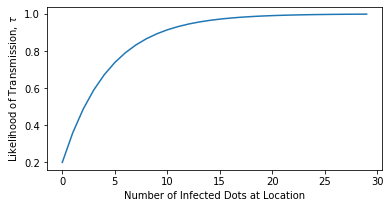

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tmr = .2
xrng = np.arange(30)
y = ((1-tmr)**xrng*tmr).cumsum()

fig, ax = plt.subplots(figsize=(6,3))
plot = ax.plot(xrng, y)
ax.set_xlabel('Number of Infected Dots at Location')
ax.set_ylabel(r'Likelihood of Transmission, $\tau$')

plt.savefig('/Users/spindicate/Documents/programming/rknot/imgs/tau_v_contacts.png', bbox_inches='tight')

<img src="https://storage.googleapis.com/rknotvids/imgs/tau_v_contacts.png" alt="Drawing" style="width: 400px;" align="center"/>


#### Dynamic Infectiousness ####

At present, **RKnot** does not formally incorporate concepts of viral load. The SIR model assumes that an infected is equally likely to cause a secondary infection at any time during the infectious period, $d$. 

In reality, the infectiousness of an individual changes over time. This is a function of the viral load of a subject. It takes time for the virus to accumulate in the subject and, then, in turn it takes time for the subject to dimish the virus via its immune response. 

The more virus a subject is carrying, the more likely it is to cause a secondary infection. And so the likelihood of transmission should follow a similar pattern as the viral load (or vice versa). This [New York Times piece](https://www.nytimes.com/interactive/2020/10/02/science/charting-a-coronavirus-infection.html?s=03) has nice visualisations of this concept for sar-cov-2.

There are several models available in the literature that provide more sophisticated infectiousness curves, including some that account for asymptomatic spread. For instance, [this](https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf) study focuses on the serial interval and [this](https://www.medrxiv.org/content/10.1101/2020.03.08.20032946v1.full.pdf) study accounts for asymptomatic spread, incubation period, etc.

Incorporation of these concepts into **RKnot** is being explored. It is important to note that $R_0$ in a SIR model is not necessarily equal to $R_0$ in a more sophisticated model.

The team behind [rt.live](https://rt.live/) reproduced this curve as follows. Code found [here](https://github.com/rtcovidlive/covid-model/blob/master/tutorial.ipynb).

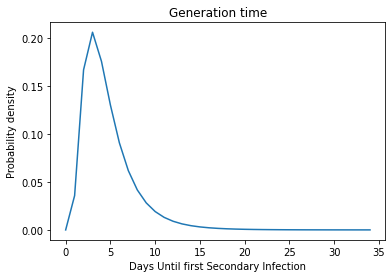

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

infdur = 35
ts = np.arange(infdur)
mean_si = 4.7
std_si = 2.9
mu_si = np.log(mean_si ** 2 / np.sqrt(std_si ** 2 + mean_si ** 2))
sigma_si = np.sqrt(np.log(std_si ** 2 / mean_si ** 2 + 1))
gt = stats.lognorm(scale=np.exp(mu_si), s=sigma_si)

fig, ax = plt.subplots()
ax.plot(ts, gt.pdf(ts))
ax.set(xlabel='Days Until first Secondary Infection',
       ylabel='Probability density',
       title='Generation time')

plt.savefig('/Users/spindicate/Documents/programming/rknot/imgs/generation_time.png', bbox_inches='tight')

<img src="https://storage.googleapis.com/rknotvids/imgs/generation_time.png" alt="Drawing" style="width: 400px;" align="center"/>

We can then discretize this distribution for daily intervals:

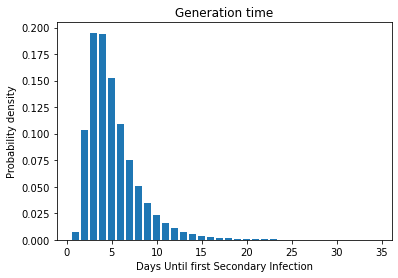

In [3]:
cumprobs = gt.cdf(ts)
gt_discrete = cumprobs[1:] - cumprobs[:-1]

fig, ax = plt.subplots()
ax.bar(ts[1:], gt_discrete)
ax.set(xlabel='Days Until first Secondary Infection',
       ylabel='Probability density',
       title='Generation time')

plt.savefig('/Users/spindicate/Documents/programming/rknot/imgs/gt_discrete.png', bbox_inches='tight')

<img src="https://storage.googleapis.com/rknotvids/imgs/gt_discrete.png" alt="Drawing" style="width: 400px;" align="center"/>

Two assumptions are made above:

1) Only one secondary infection occurs during the infectious period (this is the serial interval by definition).

2) The number of contacts on any day is unknown (and doesn't need to be known). The number of contacts is assumed to "average out" across the population and over time.

Thus, the distribution of the actual likelihood of transmission, $\tau$, as a function of time, $t$, is the above distribution multiplied by the expected secondary infections during the infectious period, $R_0$, divided by the number of contacts per day:

\begin{equation}
f(t)*\frac{R_0}{c}
\end{equation}

If, for example, we assume $R_0$ 2.5 and 2 contacts per day, we get the following likelihood of transmission curve:

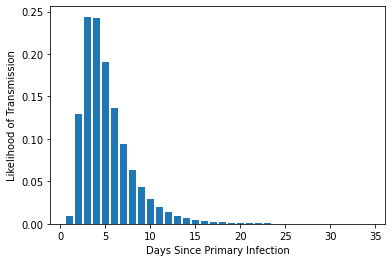

In [4]:
fig, ax = plt.subplots()
ax.bar(ts[1:], gt_discrete*2.5/2)
ax.set(xlabel='Days Since Primary Infection',
       ylabel='Likelihood of Transmission',
)

plt.savefig('/Users/spindicate/Documents/programming/rknot/imgs/tau_dist.png', bbox_inches='tight')

<img src="https://storage.googleapis.com/rknotvids/imgs/gt_discrete.png" alt="Drawing" style="width: 400px;" align="center"/>

Thus, if a susceptible subject has contact with an infected, anywhere in the space, its probability of infection is: 

$$
\begin{equation}
\tau_i
\\\textit{where: }i\textit{ = time since the infection occured}
\end{equation}
$$

With respect to multiple infected at a single location, we have to make a slight tweak to the prior equation to account for the differing transmission likelihoods that each infected dot will have based on how many days it has been infected.

Again, we sum all the branches of the probability tree that end in an infection. For each branch, the likelihood of terminating in an infection is the cumulative productive of the likelihood that each prior contact will *not* result an infection times the likelihood that the current *will* result in an infection.

$$
\begin{equation}
\sum^n_{i=1}(\tau_{it}*\prod^{i-1}_{j=0}(1-\tau_{jt}))
\end{equation}
$$
$$
\begin{equation}
\\\textit{where:}\;\tau_0=0
\\\tau\;\textit{= likelihood of transmission for dot i at time t}
\\t\;\textit{= time since infection occured for dot i}
\\n\;\textit{= number of infected dots}
\end{equation}
$$

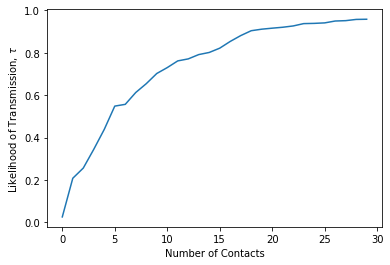

In [5]:
n=30
tmrs = np.random.uniform(0,.2,30)
xrng = np.arange(30)

not_inf = np.zeros(n)
not_inf[1:] = (1 - tmrs)[:-1]
not_inf[0] = 1
not_inf = not_inf.cumprod()
    
probs = np.zeros(n)
for i in range(n):
    probs[i] = not_inf[i]*tmrs[i]

y = probs.cumsum()

fig, ax = plt.subplots()
plot = ax.plot(xrng, y)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel(r'Likelihood of Transmission, $\tau$')

plt.savefig('/Users/spindicate/Documents/programming/rknot/imgs/multi_tau_v_contacts.png', bbox_inches='tight')

If we assume a random $\tau$ values between 0 and 20% for 30 different infected dots, the likelihood of transmission to a susceptible as a function of the number of dots at the same location, scales as follows:

<img src="https://storage.googleapis.com/rknotvids/imgs/multi_tau_v_contacts.png" alt="Drawing" style="width: 400px;" align="center"/>

***
#### References
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3782273/
+ https://www.bmj.com/content/370/bmj.m3563
+ https://www.medrxiv.org/content/10.1101/2020.06.28.20142190v1
+ https://fivethirtyeight.com/features/without-a-vaccine-herd-immunity-wont-save-us/
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3935673/
+ https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf
+ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1804098/
+ https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf
+ https://www.nytimes.com/interactive/2020/10/02/science/charting-a-coronavirus-infection.html?s=03
+ https://www.ijidonline.com/article/S1201-9712%2820%2930119-3/pdf
+ https://www.medrxiv.org/content/10.1101/2020.03.08.20032946v1.full.pdf